In [180]:
import json
import requests
from shapely.geometry import Polygon
url = "https://qua-kit.ethz.ch/exercise/33/1686/geometry" # This is the geojson data to read 

In [181]:
%%bash
touch toyeg.geojson

In [197]:
# import geometry from url
# (optional) save it to geojson locally 
f = requests.get(url).text
with open('toyeg.geojson', 'w') as f_geo:
    f_geo.write(f)


In [183]:
fp = []
b = json.loads(f) # load: convert json --> python list 
for i, feature in enumerate(b["geometry"]["features"]):
    p = feature["properties"] # p store all the properties 
    if 'special' not in p.keys():
        
        cg = feature['geometry']['coordinates'] # cg is the geometry coordinates of all surfaces
        surface_t = cg[0][0] # can use other method to detect if it is really the top 
        surface_xy = [(it[0],it[1]) for it in surface_t]
        footprint = Polygon(surface_xy)
        # print(footprint.area)
        # set new list that contains the info
        fp.append({"properties":feature['properties'], "polygon": footprint})

1987.2484575081617


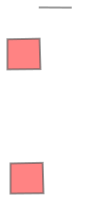

In [199]:
# test for Python Geo Interface 
# It might be wrong since it also consider the walls 
# Results can be seen from the visualizaiton of cascading. 
from shapely.geometry import shape
from shapely.ops import cascaded_union
b = json.loads(f)
shapeunion = []
for i, feature in enumerate(b["geometry"]["features"]):
    if 'special' not in feature["properties"].keys():
        d = shape(feature['geometry'])
        shapeunion.append(d)
        #print(d.area)
print(cascaded_union(shapeunion).area)
cascaded_union(shapeunion)

8085.612841219941


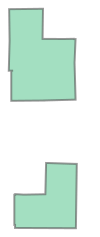

In [196]:
polyunion = []
for pp in fp:
    poly = pp['polygon']
    #print(poly.area)
    polyunion.append(poly)

print(cascaded_union(polyunion).area)
cascaded_union(polyunion)


In [99]:
from shapely.geometry import Polygon
oneshape1 = [
                [
                  -154.53488159179688,
                  113.87541961669922
                ],
                [
                  -170.66763305664062,
                  113.57225036621094
                ],
                [
                  -170.6676483154297,
                  83.33378601074219
                ],
                [
                  -137.55303955078125,
                  83.62376403808594
                ],
  [
                  -138.40211486816406,
                  114.1654052734375,
                ],
]
shape2=[
[
                  227.1302490234375,
                  -65.12775421142578,
                  45
                ],
                [
                  210.9974822998047,
                  -65.43091583251953,
                  45
                ],
                [
                  210.9974822998047,
                  -95.66939544677734,
                  45
                ],
                [
                  244.1121063232422,
                  -95.37940216064453,
                  45
                ],
                [
                  243.2630157470703,
                  -64.8377456665039,
                  45
                ],
                [
                  227.1302490234375,
                  -65.12775421142578,
                  45
                ]]

shape3 =         [
                [
                  215.075439453125,
                  134.30941772460938,
                  90
                ],
                [
                  214.22634887695312,
                  103.47777557373047,
                  90
                ],
                [
                  247.34097290039062,
                  103.76776885986328,
                  90
                ],
                [
                  247.34097290039062,
                  73.52930450439453,
                  90
                ],
                [
                  281.3047180175781,
                  74.41246795654297,
                  90
                ],
                [
                  279.6065368652344,
                  135.49575805664062,
                  90
                ],
                [
                  215.075439453125,
                  134.30941772460938,
                  90
                ]
              ]
shape3real = [(it[0],it[1]) for it in shape3]

print(shape3real)

[(215.075439453125, 134.30941772460938), (214.22634887695312, 103.47777557373047), (247.34097290039062, 103.76776885986328), (247.34097290039062, 73.52930450439453), (281.3047180175781, 74.41246795654297), (279.6065368652344, 135.49575805664062), (215.075439453125, 134.30941772460938)]


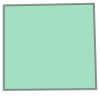

In [121]:
polygon = Polygon(surface_xy)
polygon

In [200]:
from shapely.geometry import shape
shape({'type': 'Point', 'coordinates': (0.0, 0.0)}).buffer(1.0).area

3.136548490545939